In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import cv2

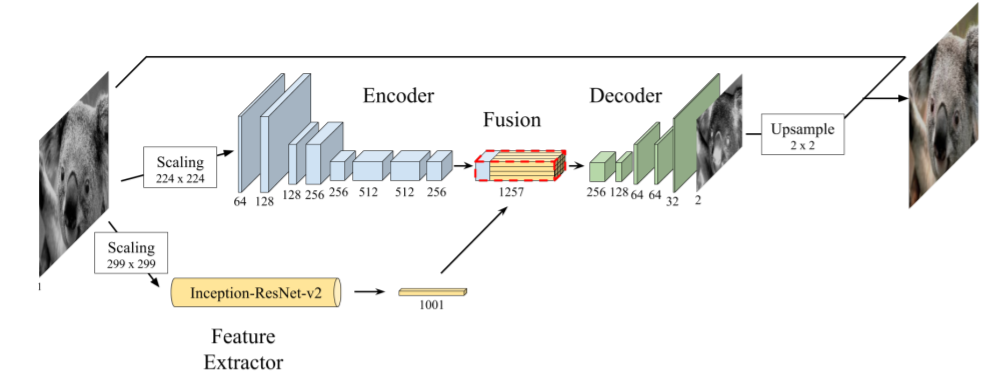

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape
import tensorflow as tf


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
images_gray = np.load('/content/gdrive/MyDrive/dataset/gray_scale.npy')
images_lab = np.load('/content/gdrive/MyDrive/dataset/ab1.npy')

In [ ]:
images_gray.shape

(25000, 224, 224)

***Get grayscale images***

In [ ]:
def pipe_line_img(gray_scale_imgs, batch_size = 100, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

input_img = pipe_line_img(images_gray, batch_size = 300)

***Get RGB images from LAB***

In [ ]:
#define the function
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    imgs = imgs.astype("uint8")
    
    #create a new empty array
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))

    #convert the image matrix into a numpy array
    imgs_ = np.array(imgs_)

    #print(imgs_.shape)
    
    return imgs_
    
#preprocess the input to 
output_img = preprocess_input(get_rbg_from_lab(gray_imgs = images_gray, ab_imgs = images_lab, n = 300))

***Define Model***

In [ ]:
#Construct the model
model_simple = Sequential()
model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))
model_simple.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, bias_initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = tf.nn.relu))


In [ ]:
#Compile the model
model_simple.compile(optimizer = tf.keras.optimizers.Adam(epsilon = 1e-8), loss = tf.losses.mean_squared_error)

***Lets train our model***

In [ ]:
#fit the model using input and output images
model_simple.fit(input_img, output_img, epochs = 10, batch_size = 16)

Epoch 1/10
19/19 [==============================] - 32s 2s/step - loss: 0.3797
Epoch 2/10
19/19 [==============================] - 31s 2s/step - loss: 0.3714
Epoch 3/10
19/19 [==============================] - 30s 2s/step - loss: 0.3515
Epoch 4/10
19/19 [==============================] - 31s 2s/step - loss: 0.3377
Epoch 5/10
19/19 [==============================] - 31s 2s/step - loss: 0.3312
Epoch 6/10
19/19 [==============================] - 31s 2s/step - loss: 0.3305
Epoch 7/10
19/19 [==============================] - 31s 2s/step - loss: 0.3300
Epoch 8/10
19/19 [==============================] - 31s 2s/step - loss: 0.3295
Epoch 9/10
19/19 [==============================] - 31s 2s/step - loss: 0.3290
Epoch 10/10
19/19 [==============================] - 31s 2s/step - loss: 0.3289


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


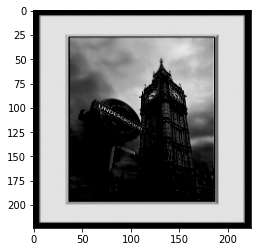

In [ ]:
plt.imshow(input_img[8])

In [ ]:
#predict for all images using the new simple model
prediction = model_simple.predict(input_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


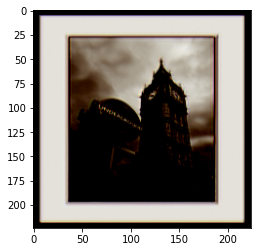

In [ ]:
#display the predicted image
plt.imshow(prediction[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


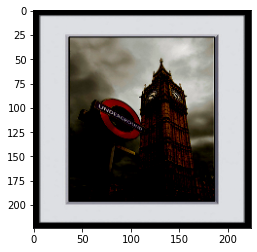

In [ ]:
#display the original image
plt.imshow(output_img[8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


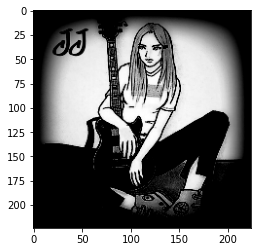

In [ ]:
plt.imshow(input_img[31])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


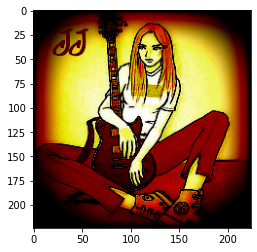

In [ ]:
#display the original image
plt.imshow(output_img[31])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


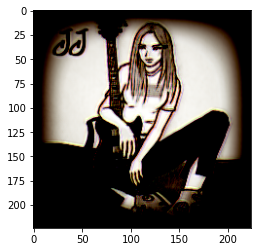

In [ ]:
#display the predicted image
plt.imshow(prediction[31])